### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics  import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df=pd.read_csv("./train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.drop(columns=['Id'],inplace=True)

In [5]:
df.rename(columns={'3SsnPorch':'SsnPorch3','2ndFlrSF':'SecondFlrSF','1stFlrSF':'FirstFlrSF',},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SsnPorch3,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.isnull().mean()*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [9]:
df_null=df.isnull().mean()*100

In [10]:
df_null.reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SsnPorch3,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,17.739726,0.0,0.0,93.767123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.547945,0.547945,0.0,0.0,0.0,2.534247,2.534247,2.60274,2.534247,0.0,2.60274,0.0,0.0,0.0,0.0,0.0,0.0,0.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.260274,5.547945,5.547945,5.547945,0.0,0.0,5.547945,5.547945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.520548,80.753425,96.30137,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_null=df_null.reset_index()

In [12]:
df_null

,index,0
0,MSSubClass,0.000000
1,MSZoning,0.000000
2,LotFrontage,17.739726
3,LotArea,0.000000
4,Street,0.000000
...,...,...
75,MoSold,0.000000
76,YrSold,0.000000
77,SaleType,0.000000
78,SaleCondition,0.000000


In [13]:
df_null.rename(columns={0:'Null'}, inplace=True)

In [14]:
import klib as k

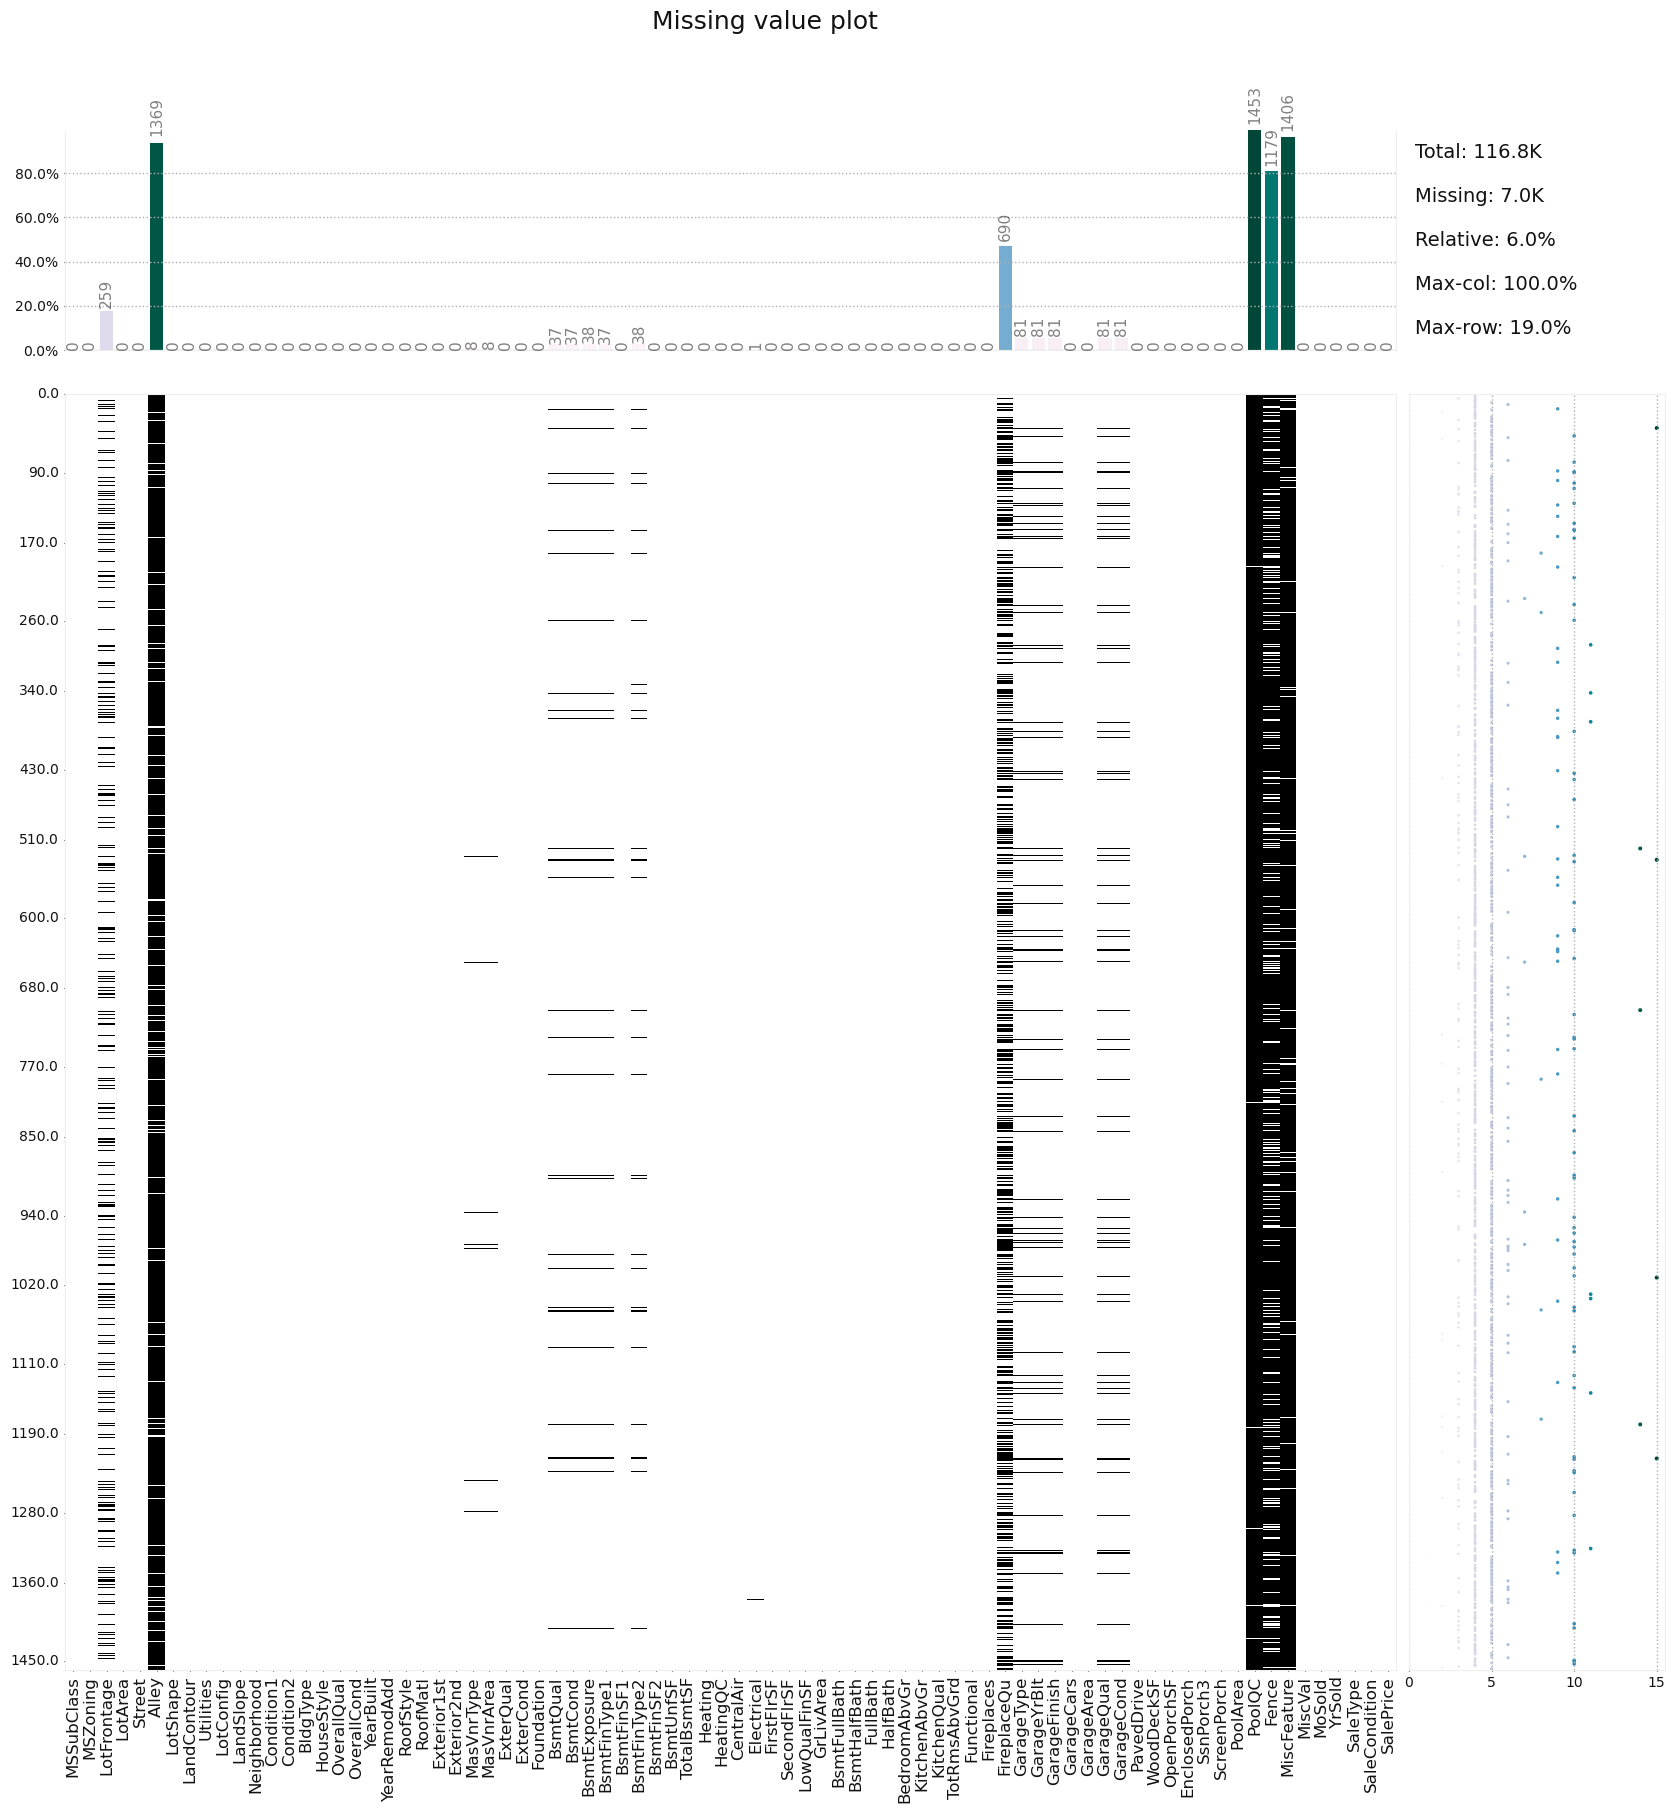

In [15]:
k.missingval_plot(data=df);

In [16]:
null_df1 = df.isnull().sum().reset_index()

In [17]:
null_df1.rename(columns={0:'Null'}, inplace=True)

In [18]:
null_df2 = null_df1[null_df1.Null !=0]

In [19]:
null_df2['index'].values

array(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

In [20]:
null_list=null_df2['index'].values.tolist()

In [21]:
null_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [22]:
df_null1=df_null.query("Null>=20")

In [23]:
df_null_new=df_null1['index'].values.tolist()

In [24]:
df_null_new

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [25]:
df.drop(columns=df_null_new, inplace=True)

In [26]:
df.fillna(df.mean(),inplace=True)

In [27]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SsnPorch3,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,0,81,0,0,81,81,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
le=LabelEncoder()

In [29]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]= le.fit_transform(df[i])

In [30]:

df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SsnPorch3,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0,5,0,953,953,1,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,1,1999.0,1,2,460,4,4,2,0,40,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790,4,163,589,1542,1,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,1,1978.0,2,2,500,4,4,2,349,0,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275,5,0,877,1152,1,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,1,1941.0,1,1,252,4,4,2,0,60,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49,4,1029,0,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1,1950.0,2,1,240,4,4,2,366,0,112,0,0,0,0,4,2010,8,4,142125


### Selecting The Features and targets

In [31]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [32]:
x

array([[  60.,    3.,   65., ..., 2008.,    8.,    4.],
       [  20.,    3.,   80., ..., 2007.,    8.,    4.],
       [  60.,    3.,   68., ..., 2008.,    8.,    4.],
       ...,
       [  70.,    3.,   66., ..., 2010.,    8.,    4.],
       [  20.,    3.,   68., ..., 2010.,    8.,    4.],
       [  20.,    3.,   75., ..., 2008.,    8.,    4.]])

#### splitting the data

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

#### Checking model score

In [34]:
model=LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred=model.predict(x_test)

Traning accuracy

In [37]:
model.score(x_train,y_train)

0.846128471399225

Testing accuracy

In [38]:
model.score(x_test,y_test)

0.849021949220579

#### Defining feature selection with all features include

In [39]:
fs=SelectKBest(score_func=f_regression,k='6')

In [40]:
model={"LinearRegression":LinearRegression(),
       "RandomForestRegressor":RandomForestRegressor(),
      "Ridge":Ridge(),
      "Lasso":Lasso(),
       "DecisionTreeRegressor":DecisionTreeRegressor(),
       "RandomForestRegressor":RandomForestRegressor(),
       "AdaBoostRegressor":AdaBoostRegressor(),
      "GradientBoostingRegressor":GradientBoostingRegressor()}

In [41]:
for name,model in model.items():
    model.fit(x_train,y_train)
    print("Model Trained with {}".format(name))
    traning_score=model.score(x_train,y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score = r2_score(y_test,model.predict(x_test))*100
    mae= mean_absolute_error(y_test,model.predict(x_test))
    mse= mean_squared_error(y_test,model.predict(x_test))
    rmse= np.sqrt(mse)
    print("r2score: ",score)
    print("testing_score: ",testing_score)
    print("traning_score: ", traning_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("="*100)

Model Trained with LinearRegression
r2score:  84.9021949220579
testing_score:  84.9021949220579
traning_score:  84.6128471399225
mae:  21434.72043199654
mse:  1158050899.6034212
rmse_test:  34030.14692303607
Model Trained with RandomForestRegressor
r2score:  89.21269649835934
testing_score:  89.21269649835934
traning_score:  98.12944397063103
mae:  17797.810890410958
mse:  827421367.5351582
rmse_test:  28764.932948560094
Model Trained with Ridge
r2score:  84.88789464534624
testing_score:  84.88789464534624
traning_score:  84.60186991311973
mae:  21408.31567102443
mse:  1159147777.475736
rmse_test:  34046.25937567497
Model Trained with Lasso
r2score:  84.90143100110636
testing_score:  84.90143100110636
traning_score:  84.61281565539358
mae:  21432.69044830359
mse:  1158109494.8323703
rmse_test:  34031.00784332386
Model Trained with DecisionTreeRegressor
r2score:  77.844355948927
testing_score:  77.844355948927
traning_score:  100.0
mae:  27841.020547945205
mse:  1699410172.0205479
rmse_

**Here the best fit model is gradiantBoost Regressor**

#### lets increase model accuracy by treating outliers

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [43]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPor

In [44]:
def outlier_treat(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL


In [45]:
for column in df.columns:
    UL, LL = outlier_treat(df[column])
    df[column] = np.where((df[column] > UL) | (df[column] < LL), np.nan, df[column])

In [46]:
df.isnull().mean()*100

MSSubClass        7.054795
MSZoning         21.164384
LotFrontage       7.260274
LotArea           4.726027
Street            0.410959
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType         13.219178
SaleCondition    17.945205
SalePrice         4.178082
Length: 75, dtype: float64

In [47]:
df.dropna(inplace=True)

In [48]:
df.shape

(136, 75)

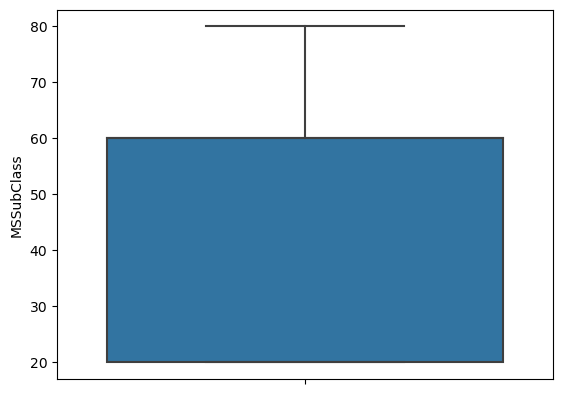

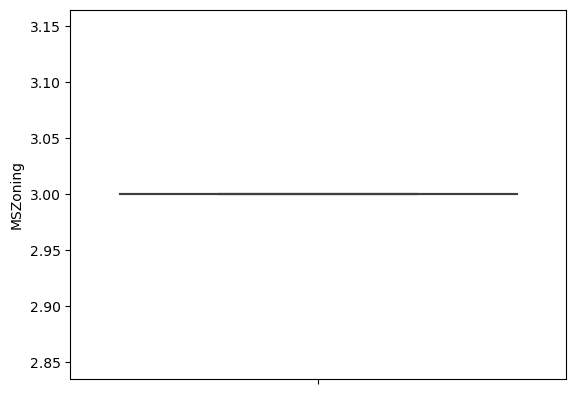

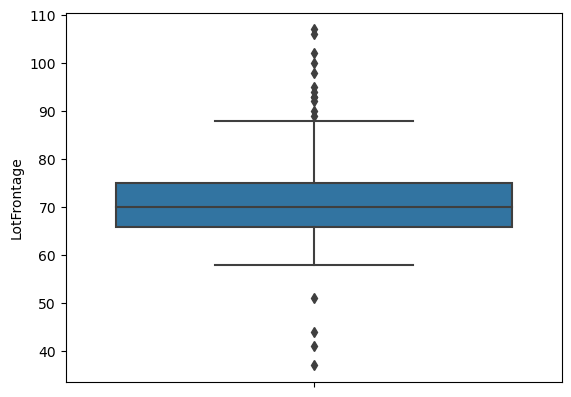

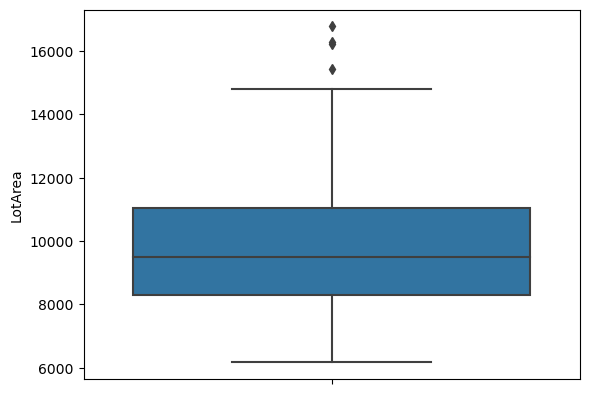

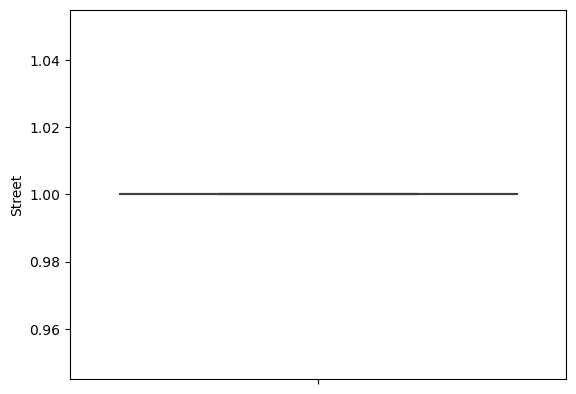

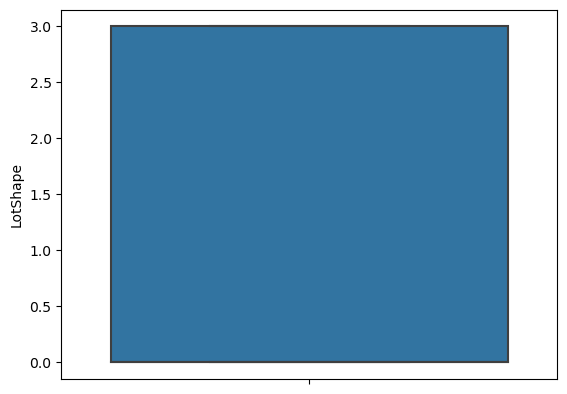

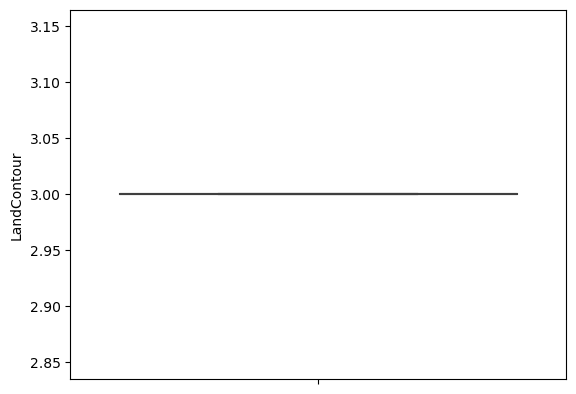

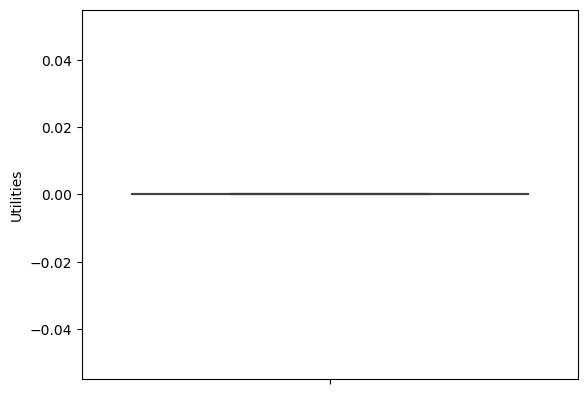

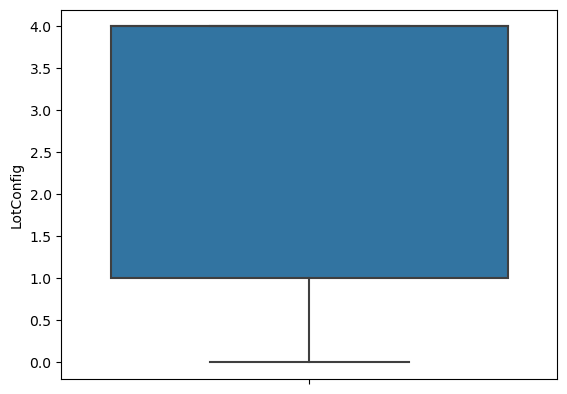

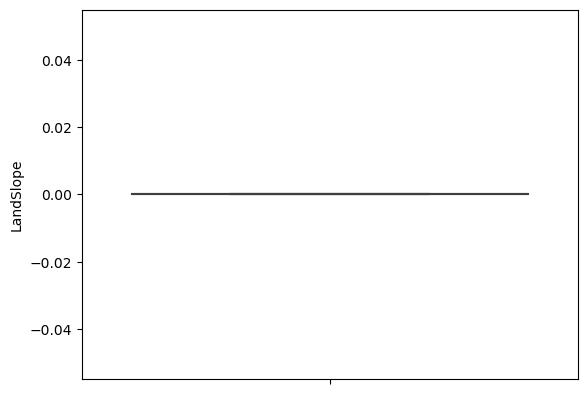

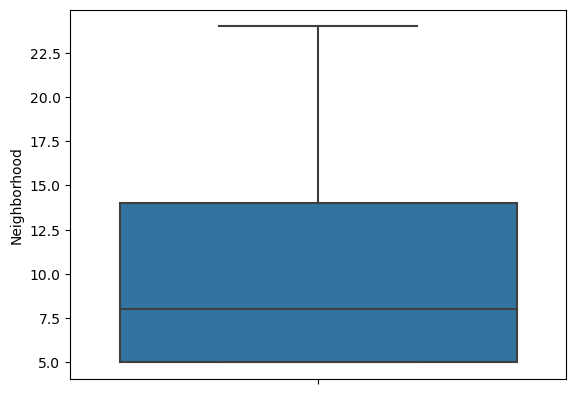

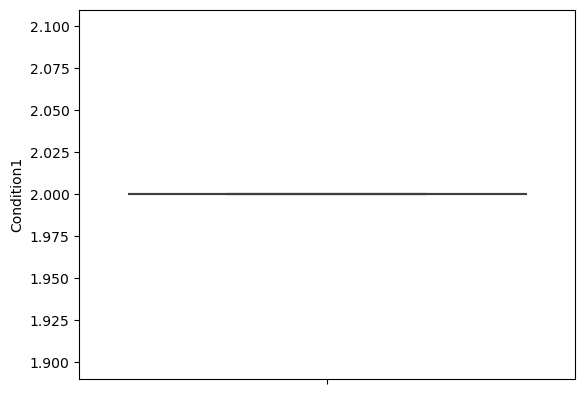

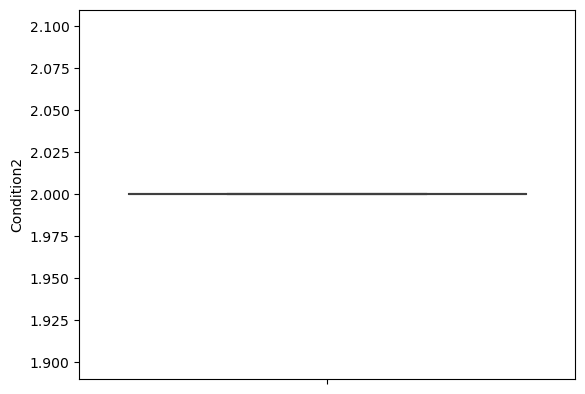

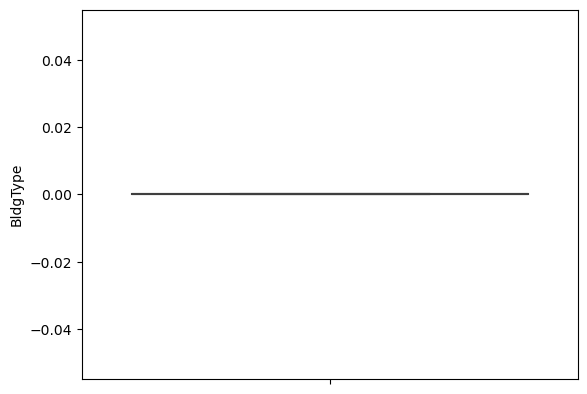

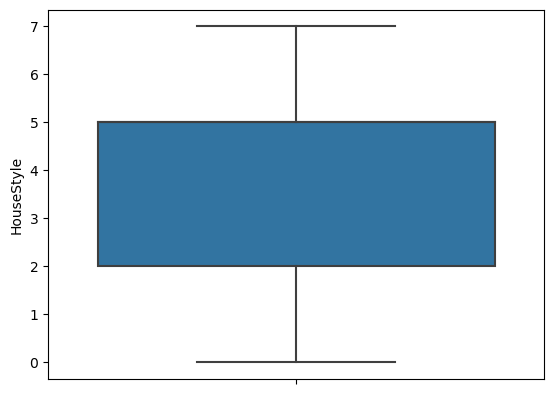

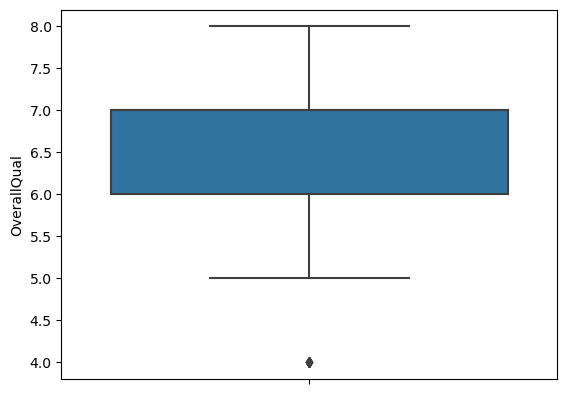

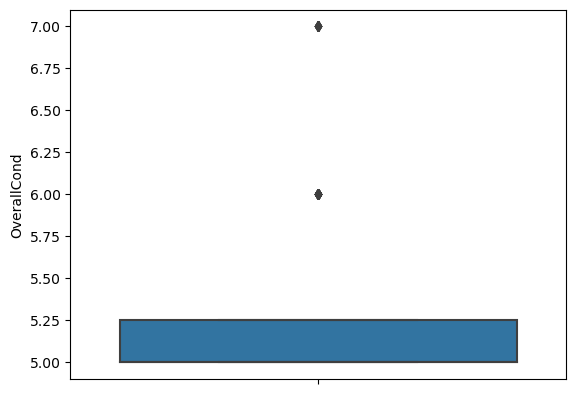

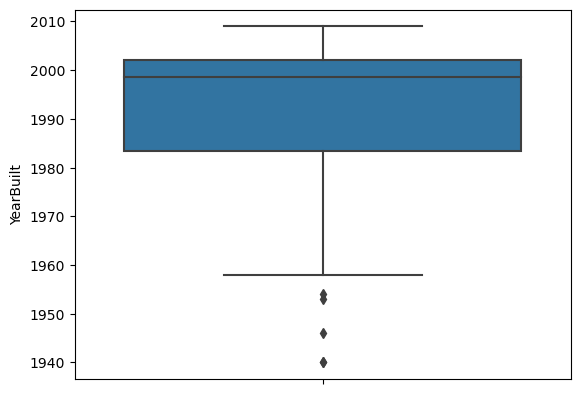

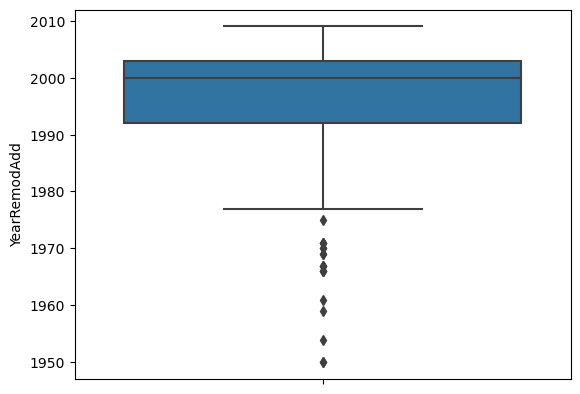

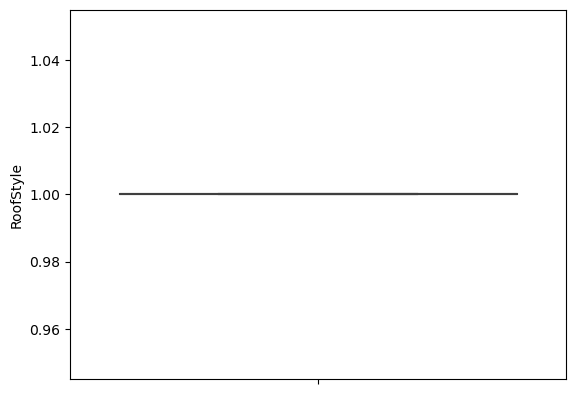

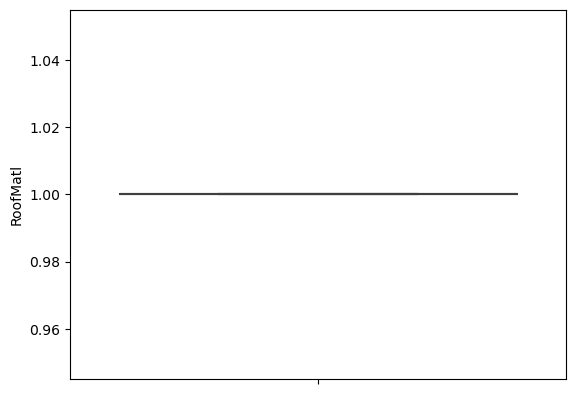

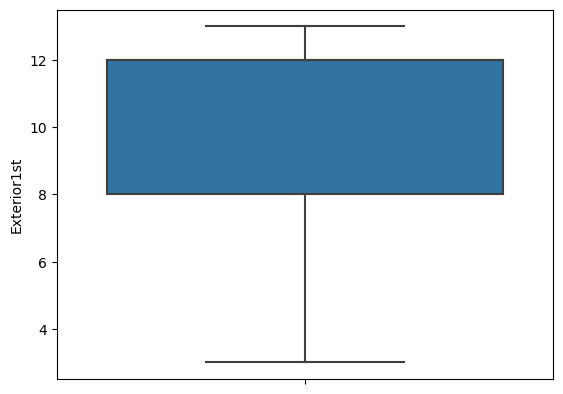

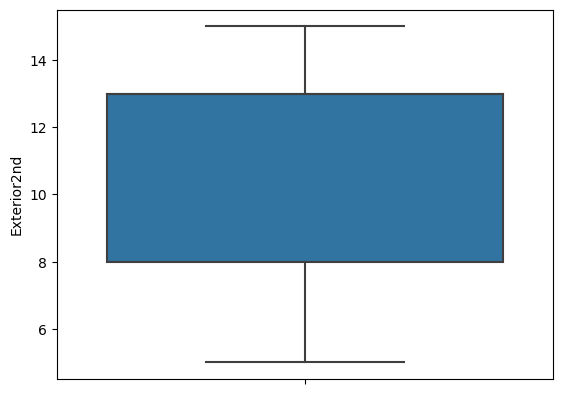

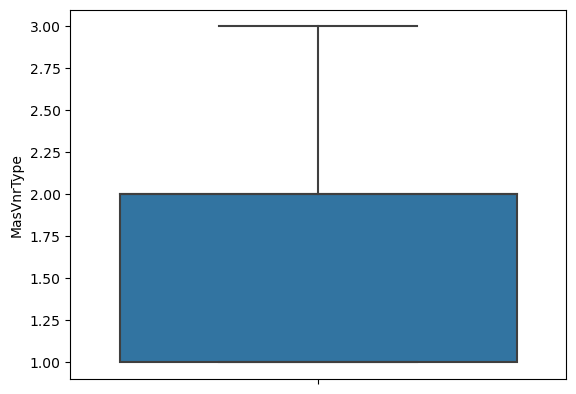

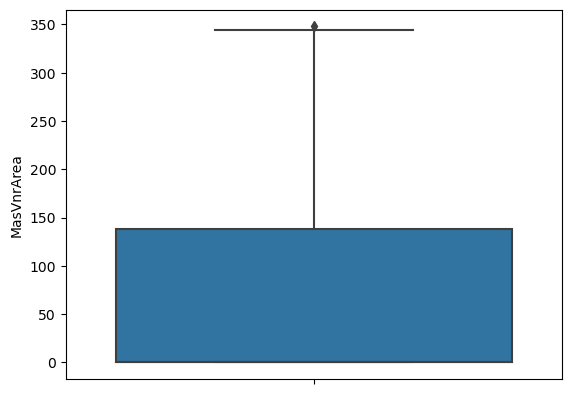

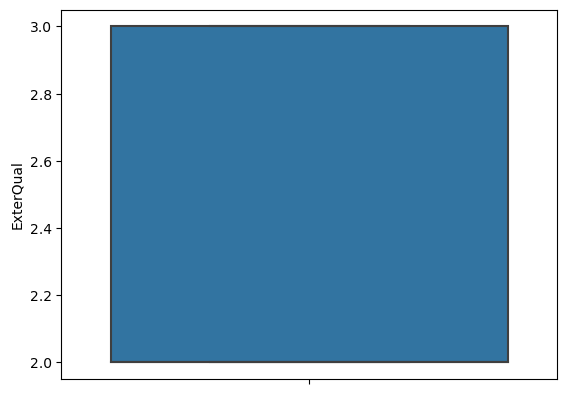

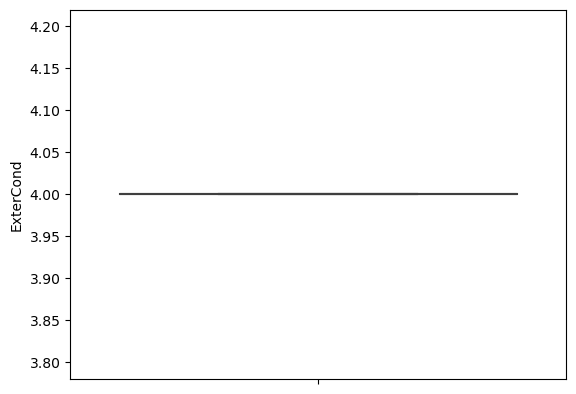

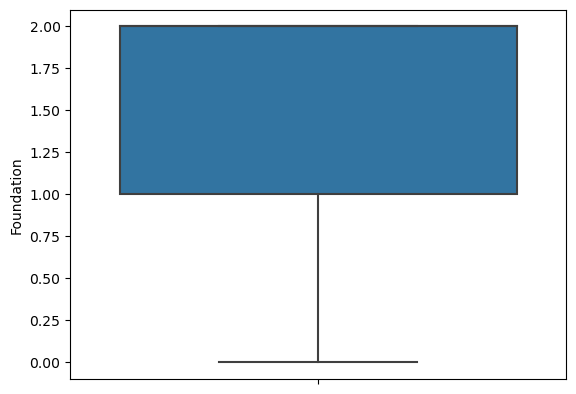

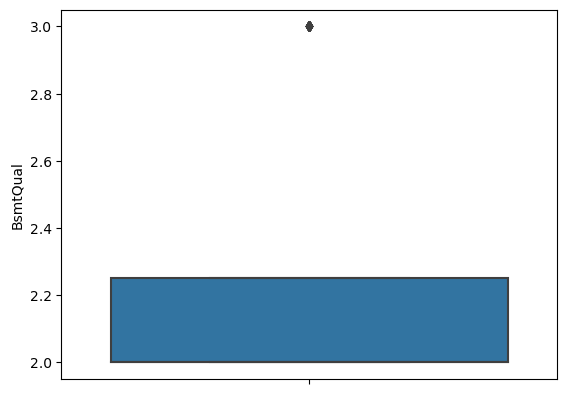

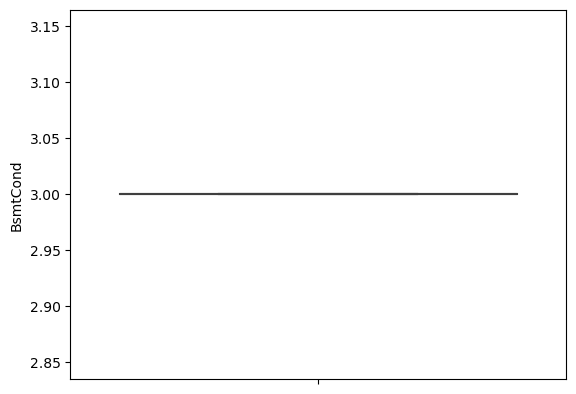

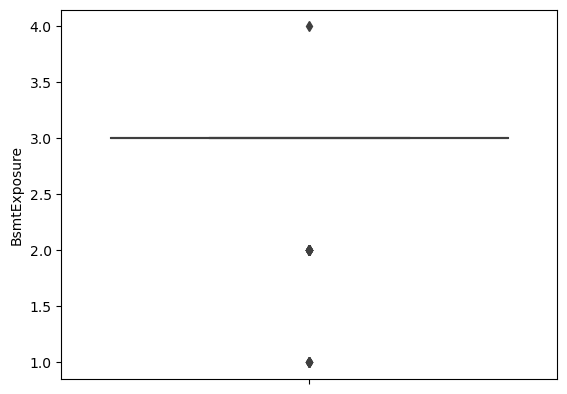

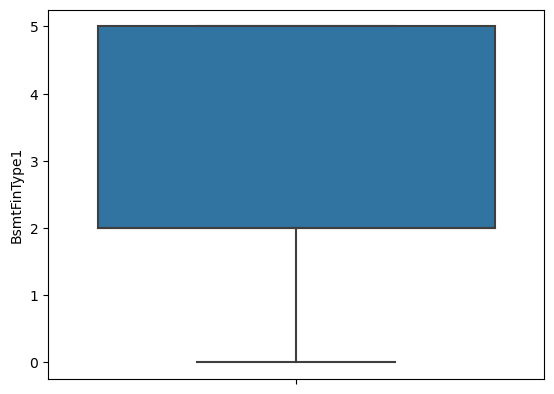

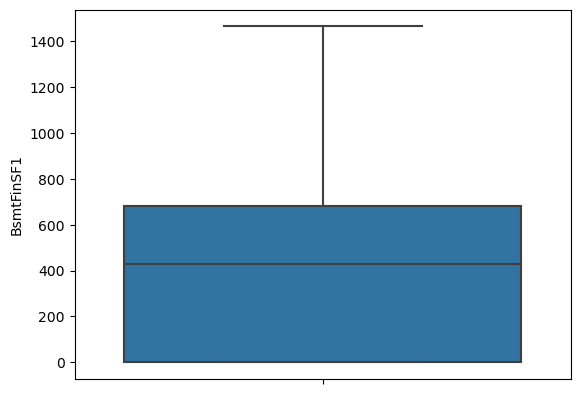

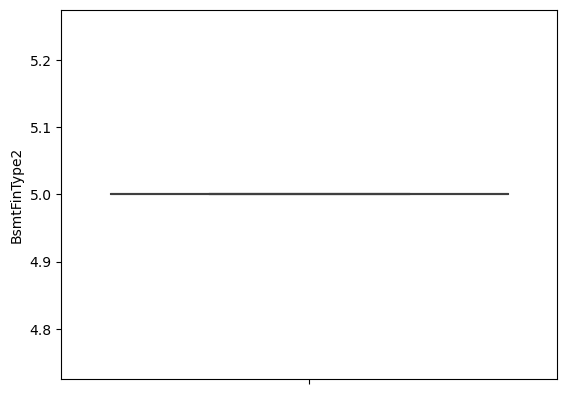

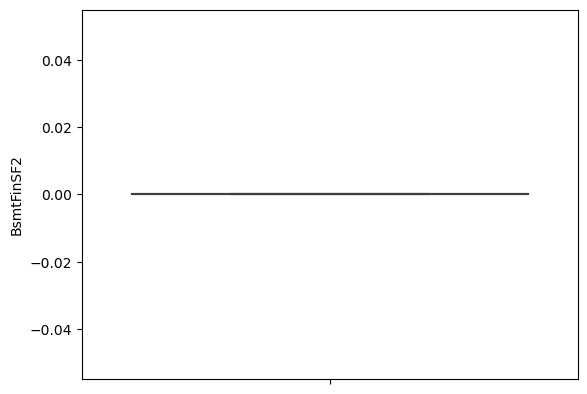

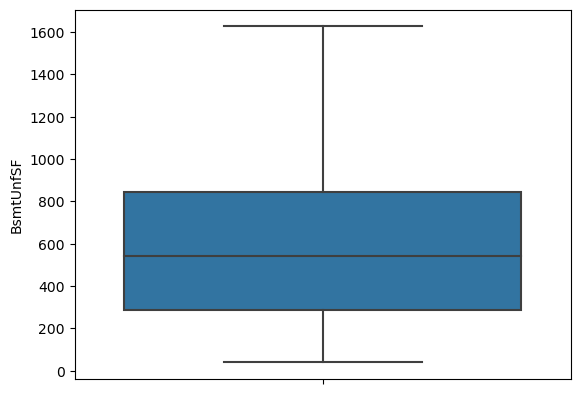

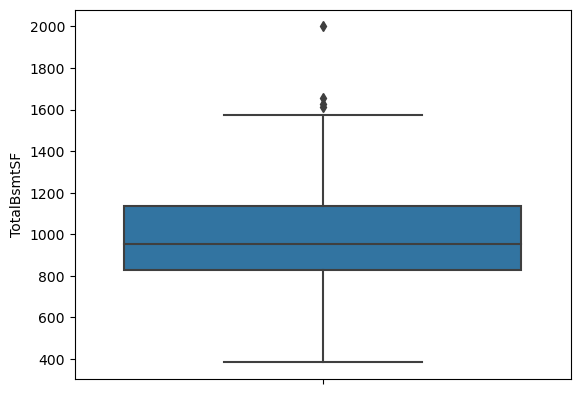

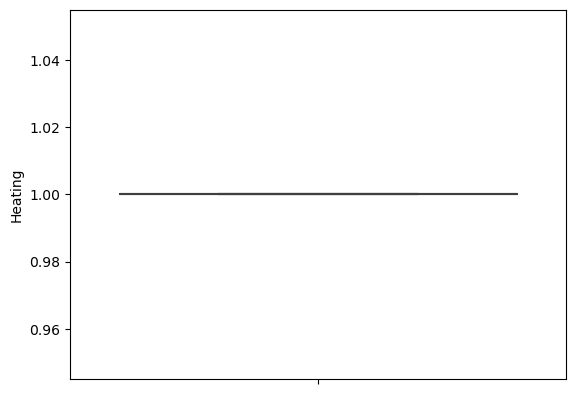

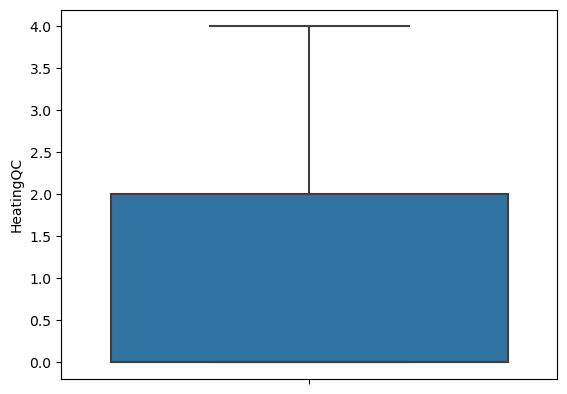

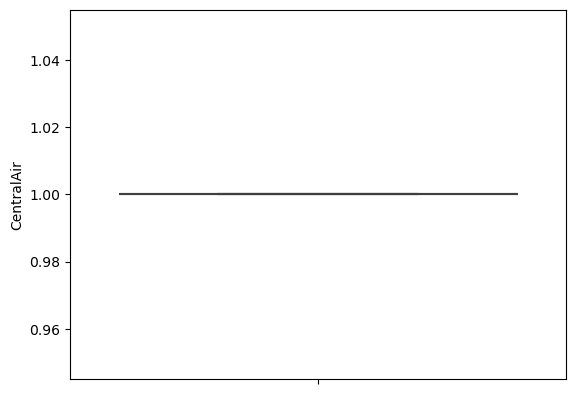

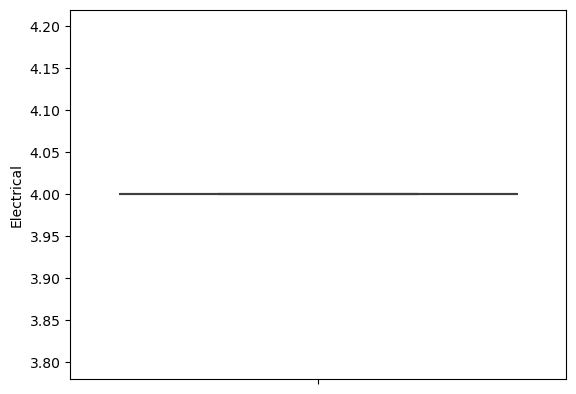

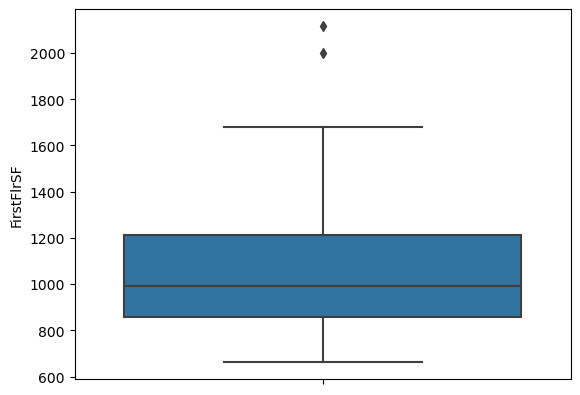

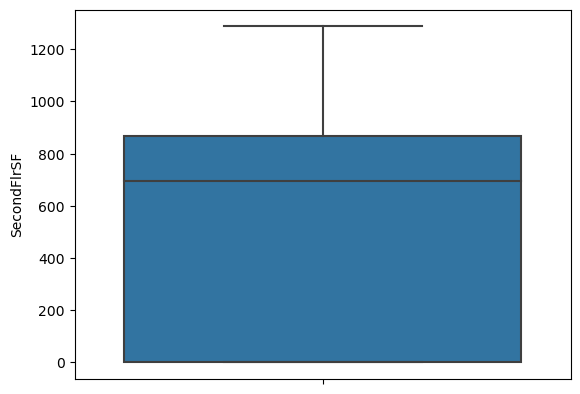

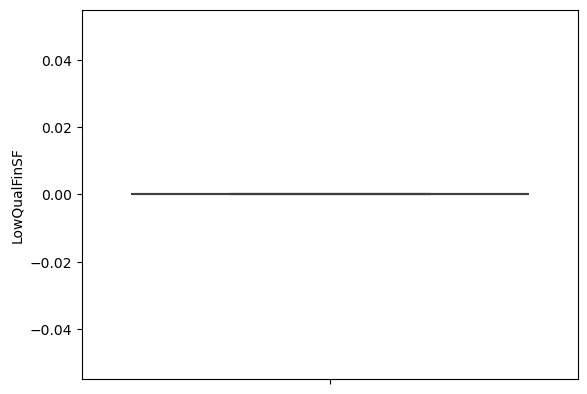

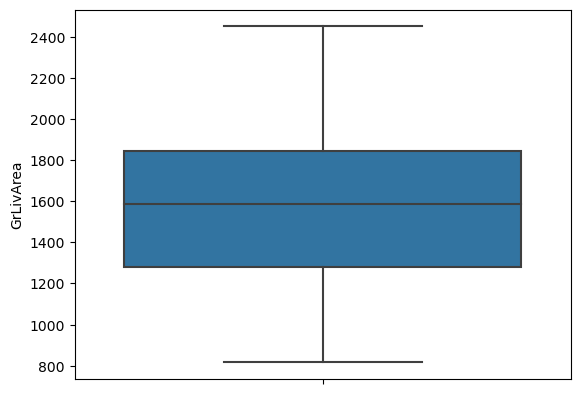

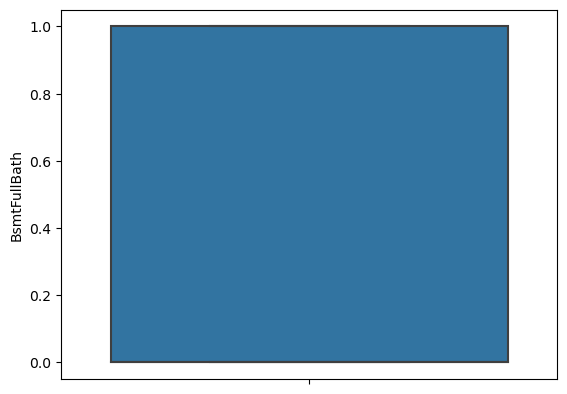

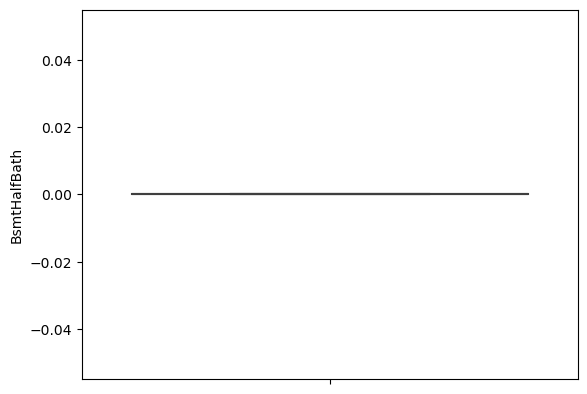

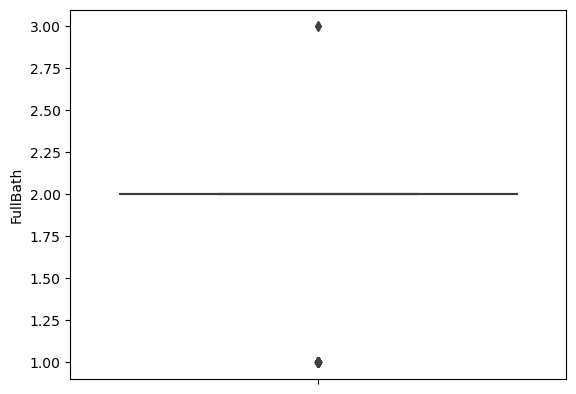

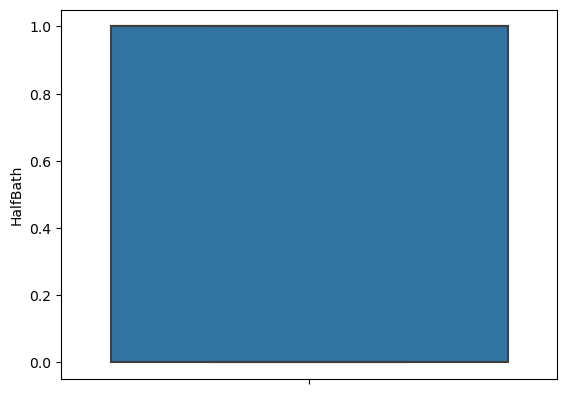

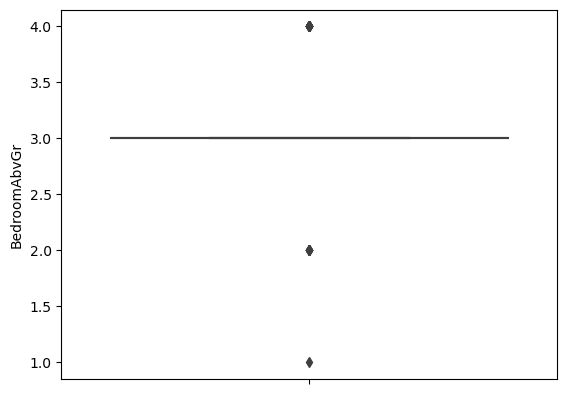

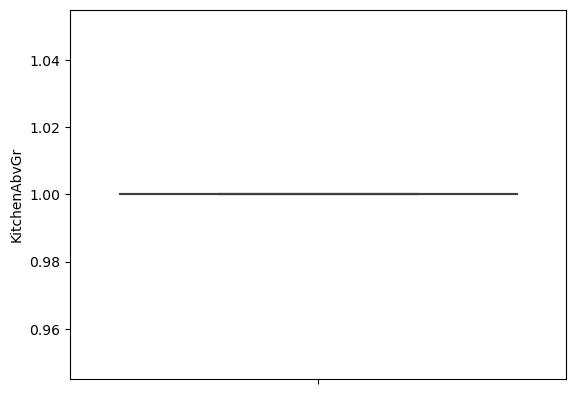

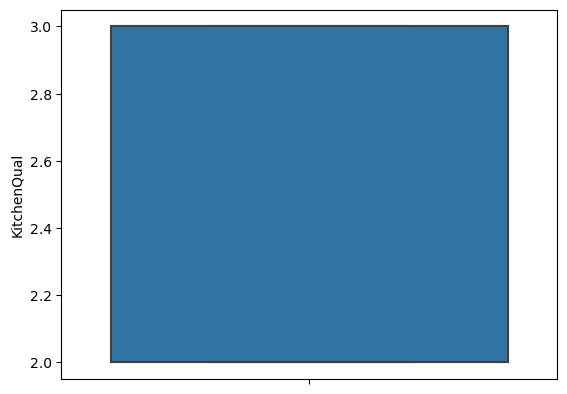

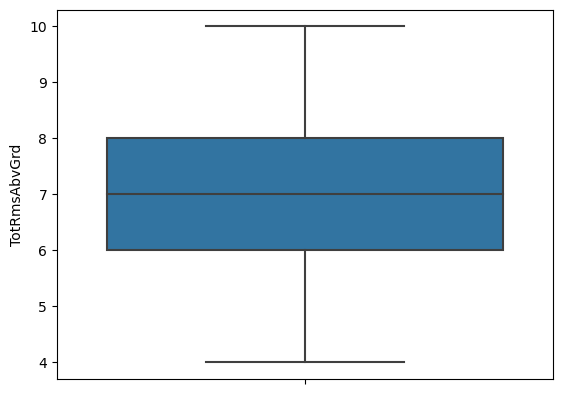

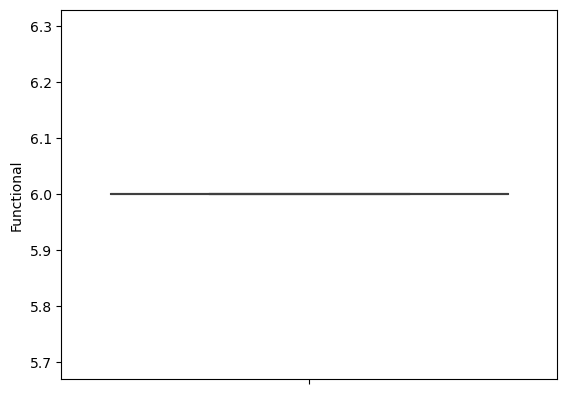

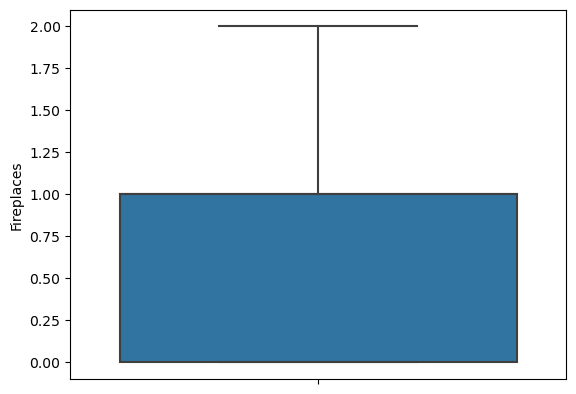

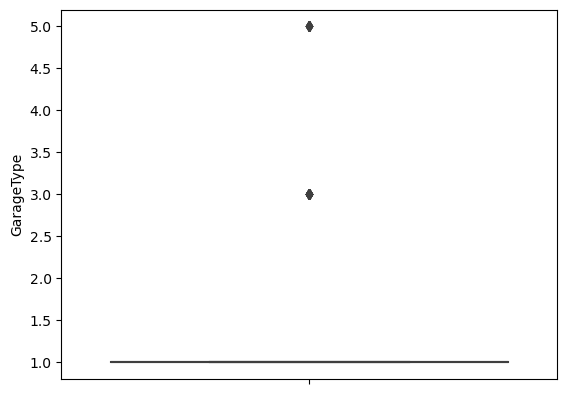

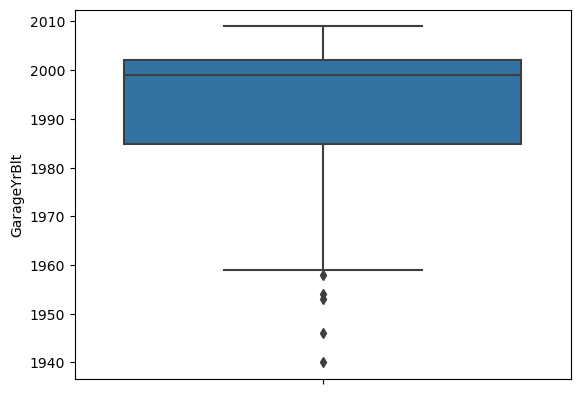

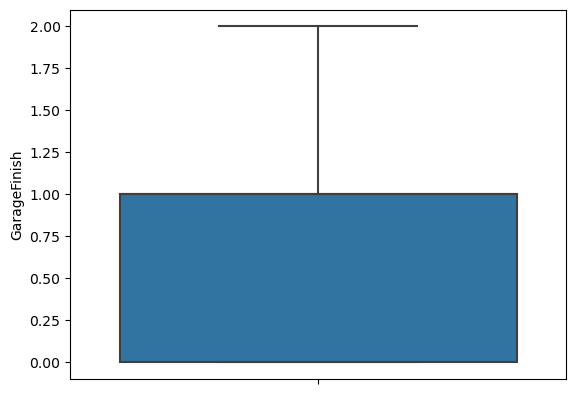

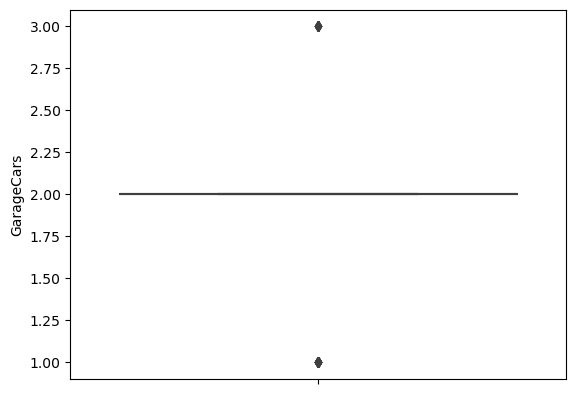

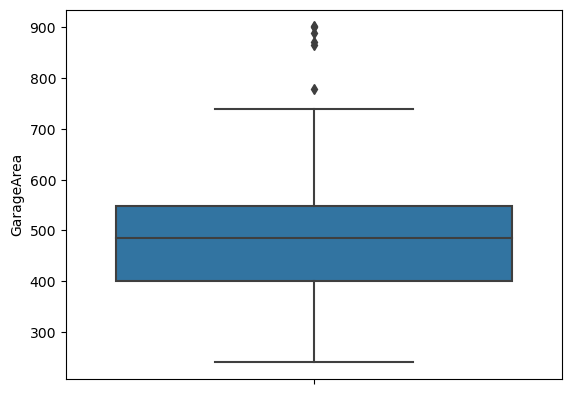

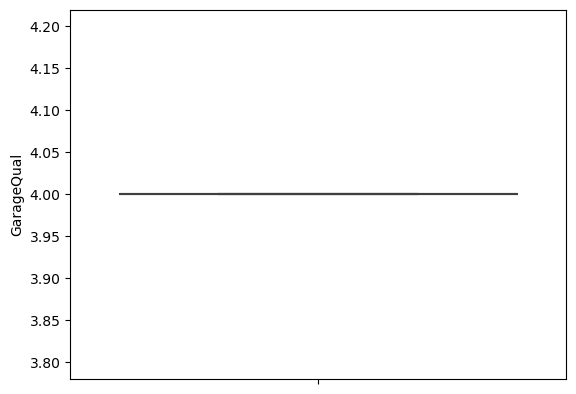

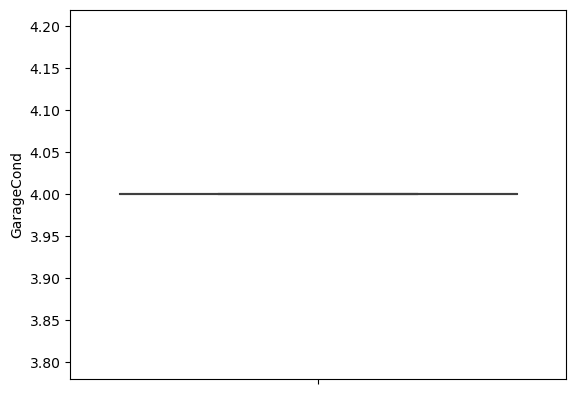

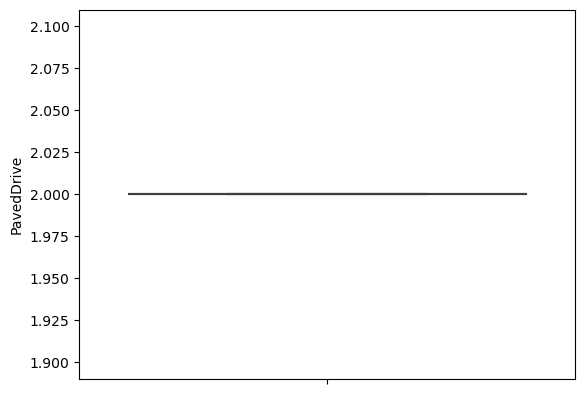

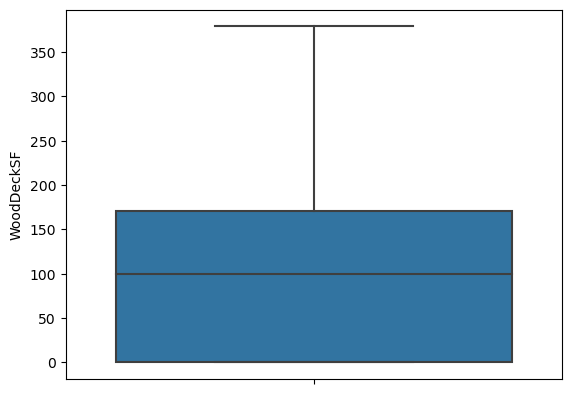

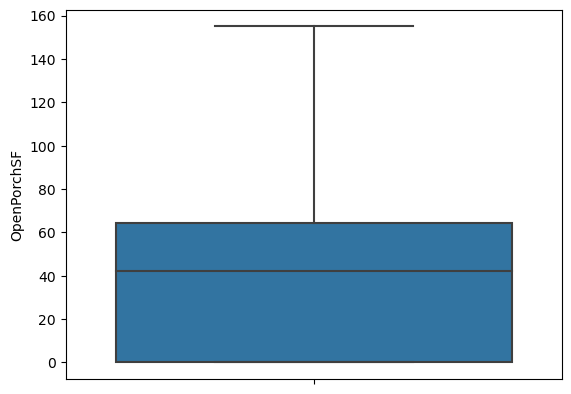

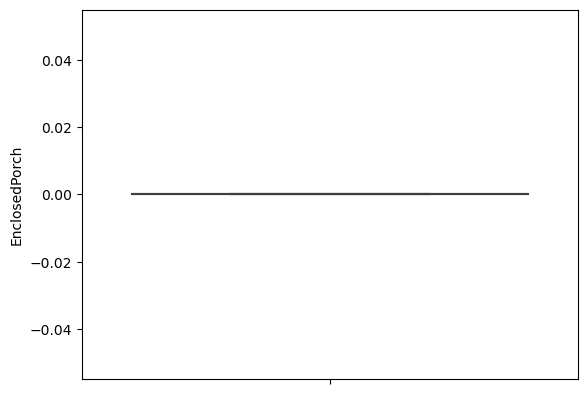

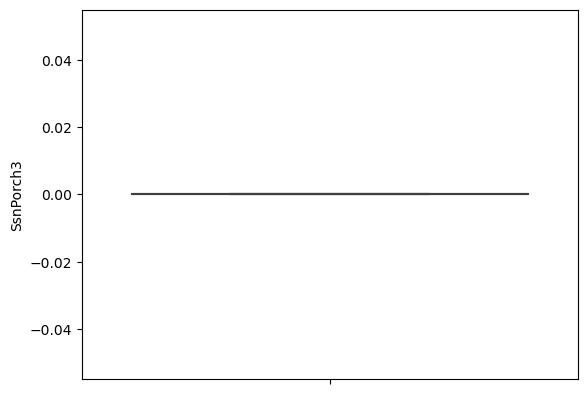

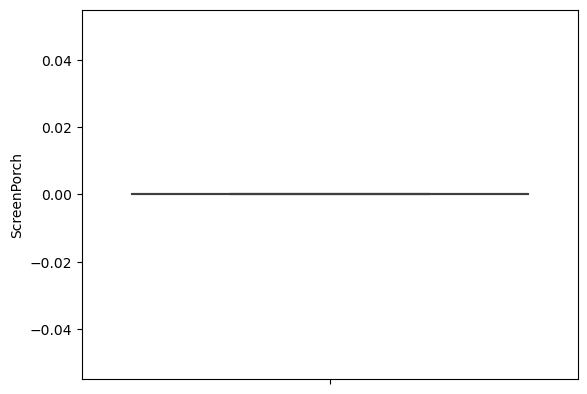

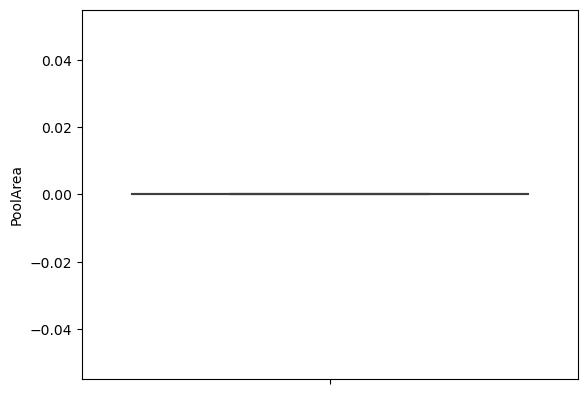

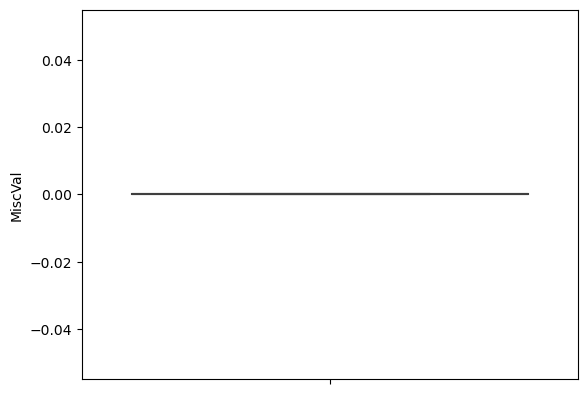

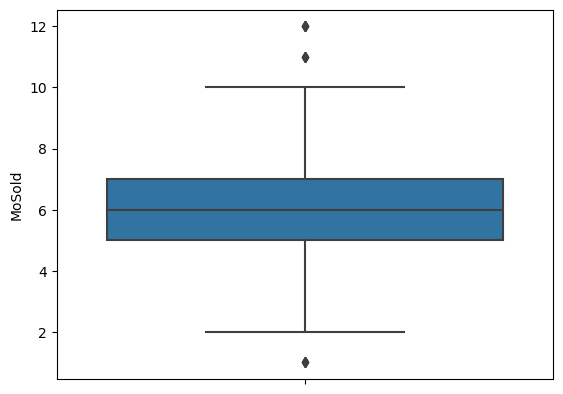

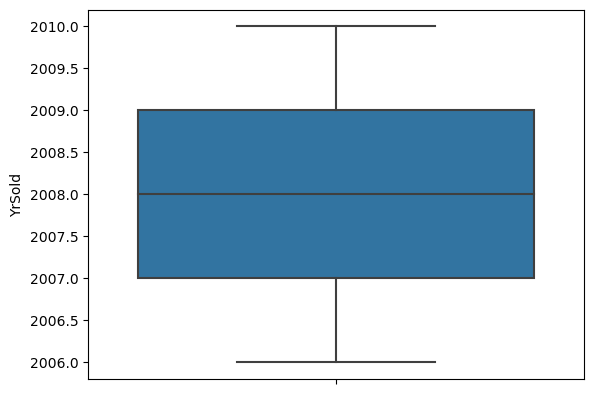

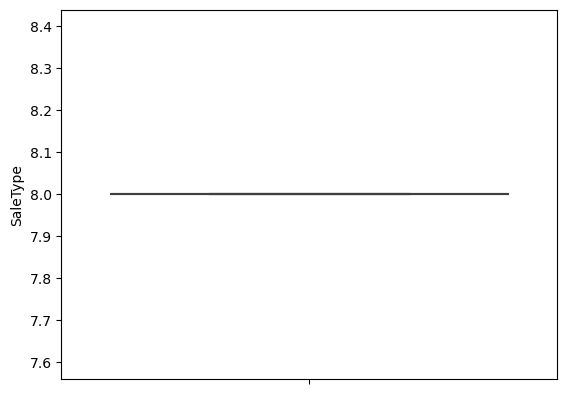

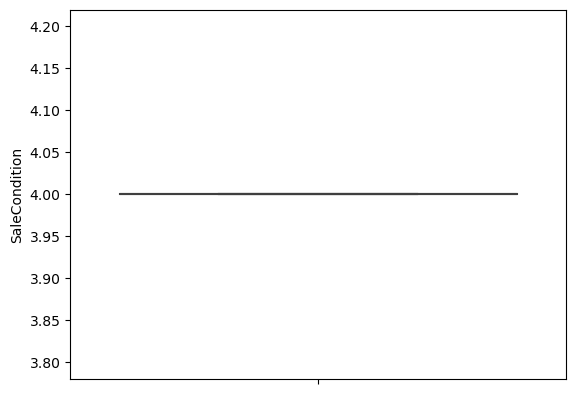

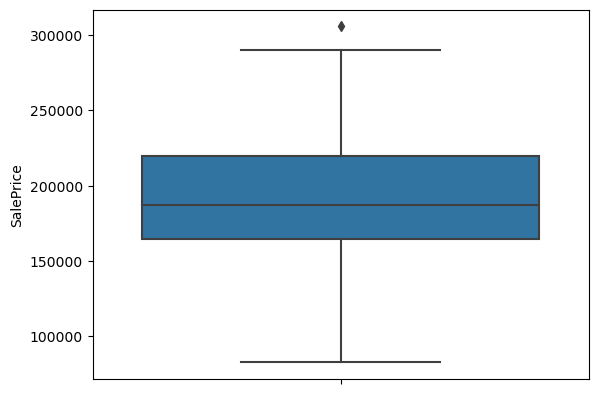

In [49]:
for i in df.columns:
    sns.boxplot(y=df[i])
    plt.show()

In [50]:
df.shape

(136, 75)

In [51]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SsnPorch3,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.000000,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2003.0,2003.0,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706.0,5.0,0.0,150.0,856.0,1.0,0.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,2003.0,1.0,2.0,548.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0,208500.0
2,60.0,3.0,68.000000,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2002.0,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486.0,5.0,0.0,434.0,920.0,1.0,0.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,1.0,2001.0,1.0,2.0,608.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0,223500.0
31,20.0,3.0,70.049958,8544.0,1.0,0.0,3.0,0.0,1.0,0.0,19.0,2.0,2.0,0.0,2.0,5.0,6.0,1966.0,2006.0,1.0,1.0,6.0,6.0,2.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,5.0,0.0,5.0,0.0,1228.0,1228.0,1.0,2.0,1.0,4.0,1228.0,0.0,0.0,1228.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,6.0,6.0,0.0,1.0,1966.0,2.0,1.0,271.0,4.0,4.0,2.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,8.0,4.0,149350.0
49,20.0,3.0,66.000000,7742.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,5.0,7.0,1966.0,1966.0,1.0,1.0,6.0,6.0,2.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,1.0,763.0,5.0,0.0,192.0,955.0,1.0,0.0,1.0,4.0,955.0,0.0,0.0,955.0,1.0,0.0,1.0,0.0,3.0,1.0,3.0,6.0,6.0,0.0,1.0,1966.0,2.0,1.0,386.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007.0,8.0,4.0,127000.0
57,60.0,3.0,89.000000,11645.0,1.0,0.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2004.0,2004.0,1.0,1.0,12.0,13.0,2.0,0.0,2.0,4.0,2.0,2.0,3.0,3.0,5.0,0.0,5.0,0.0,860.0,860.0,1.0,0.0,1.0,4.0,860.0,860.0,0.0,1720.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,7.0,6.0,0.0,1.0,2004.0,1.0,2.0,565.0,4.0,4.0,2.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2006.0,8.0,4.0,196500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,60.0,3.0,62.000000,7415.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6.0,5.0,2004.0,2004.0,1.0,1.0,12.0,13.0,2.0,0.0,3.0,4.0,2.0,3.0,3.0,3.0,2.0,759.0,5.0,0.0,80.0,839.0,1.0,0.0,1.0,4.0,864.0,729.0,0.0,1593.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,8.0,6.0,1.0,1.0,2004.0,0.0,2.0,398.0,4.0,4.0,2.0,100.0,75.0,0.0,0.0,0.0,0.0,0.0,4.0,2008.0,8.0,4.0,193000.0
1410,60.0,3.0,79.000000,12420.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2001.0,1.0,1.0,12.0,13.0,2.0,0.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,666.0,5.0,0.0,278.0,944.0,1.0,0.0,1.0,4.0,944.0,896.0,0.0,1840.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,0.0,1.0,2001.0,1.0,2.0,622.0,4.0,4.0,2.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0,8.0,4.0,230000.0
1433,60.0,3.0,93.000000,10261.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6.0,5.0,2000.0,2000.0,1.0,1.0,12.0,13.0,1.0,318.0,3.0,4.0,2.0,2.0,3.0,3.0,5.0,0.0,5.0,0.0,936.0,936.0,1.0,0.0,1.0,4.0,962.0,830.0,0.0,1792.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,8.0,6.0,1.0,1.0,2000.0,0.0,2.0,451.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2008.0,8.0,4.0,186500.0
1436,20.0,3.0,60.000000,9000.0,1.0,3.0,3.0,0.0,2.0,0.0,12.0,2.0,2.0,0.0,2.0,4.0,6.0,1971.0,197

In [52]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### spliting the data into traning and testing

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

#### Defining featre selection with all features include

In [54]:
fs=SelectKBest(score_func=f_regression,k=7)

#### Fillig  the fs

In [55]:
fs.fit(x_train,y_train)

SelectKBest(k=7, score_func=<function f_regression at 0x000001FF9F7A7B50>)

In [56]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [57]:
x_test_fs.shape

(28, 7)

In [58]:
x_train_fs.shape

(108, 7)

### Checking the scores for the feature

In [59]:
fs.scores_

array([2.15195597e+01, 0.00000000e+00, 1.91950532e+00, 2.38527222e+01,
       0.00000000e+00, 7.98291390e-01, 0.00000000e+00, 0.00000000e+00,
       4.46198422e-01, 0.00000000e+00, 2.89349723e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.24178995e+01, 1.66338844e+02,
       2.05617651e+01, 7.80283930e+01, 4.83308082e+01, 0.00000000e+00,
       0.00000000e+00, 1.71896358e+01, 1.36332831e+01, 1.51934698e-02,
       9.20768327e+00, 5.22780223e+01, 0.00000000e+00, 5.91449375e+01,
       5.46673068e+01, 0.00000000e+00, 1.25804640e+00, 1.23162607e+00,
       1.66894205e+00, 0.00000000e+00, 0.00000000e+00, 5.59809263e-01,
       8.40692535e+00, 0.00000000e+00, 5.18552656e+01, 0.00000000e+00,
       0.00000000e+00, 9.16587507e+00, 4.63814823e+01, 0.00000000e+00,
       2.94883675e+02, 3.35108268e+00, 0.00000000e+00, 9.34278807e+01,
       1.48464678e+01, 2.19762412e+01, 0.00000000e+00, 5.76751061e+01,
       7.82745731e+01, 0.00000000e+00, 1.03734932e+01, 9.14339223e-01,
      

In [60]:
for i in range(len(fs.scores_)):
    print('Feature %d:%f' % (i,fs.scores_[i]))

Feature 0:21.519560
Feature 1:0.000000
Feature 2:1.919505
Feature 3:23.852722
Feature 4:0.000000
Feature 5:0.798291
Feature 6:0.000000
Feature 7:0.000000
Feature 8:0.446198
Feature 9:0.000000
Feature 10:2.893497
Feature 11:0.000000
Feature 12:0.000000
Feature 13:0.000000
Feature 14:22.417899
Feature 15:166.338844
Feature 16:20.561765
Feature 17:78.028393
Feature 18:48.330808
Feature 19:0.000000
Feature 20:0.000000
Feature 21:17.189636
Feature 22:13.633283
Feature 23:0.015193
Feature 24:9.207683
Feature 25:52.278022
Feature 26:0.000000
Feature 27:59.144938
Feature 28:54.667307
Feature 29:0.000000
Feature 30:1.258046
Feature 31:1.231626
Feature 32:1.668942
Feature 33:0.000000
Feature 34:0.000000
Feature 35:0.559809
Feature 36:8.406925
Feature 37:0.000000
Feature 38:51.855266
Feature 39:0.000000
Feature 40:0.000000
Feature 41:9.165875
Feature 42:46.381482
Feature 43:0.000000
Feature 44:294.883675
Feature 45:3.351083
Feature 46:0.000000
Feature 47:93.427881
Feature 48:14.846468
Feature 49:

In [61]:
df_new=df.iloc[0:30,:]
df_new

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SsnPorch3,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.000000,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2003.0,2003.0,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706.0,5.0,0.0,150.0,856.0,1.0,0.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,2003.0,1.0,2.0,548.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0,208500.0
2,60.0,3.0,68.000000,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2002.0,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486.0,5.0,0.0,434.0,920.0,1.0,0.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,1.0,2001.0,1.0,2.0,608.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0,223500.0
31,20.0,3.0,70.049958,8544.0,1.0,0.0,3.0,0.0,1.0,0.0,19.0,2.0,2.0,0.0,2.0,5.0,6.0,1966.0,2006.0,1.0,1.0,6.0,6.0,2.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,5.0,0.0,5.0,0.0,1228.0,1228.0,1.0,2.0,1.0,4.0,1228.0,0.0,0.0,1228.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,6.0,6.0,0.0,1.0,1966.0,2.0,1.0,271.0,4.0,4.0,2.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,8.0,4.0,149350.0
49,20.0,3.0,66.000000,7742.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,5.0,7.0,1966.0,1966.0,1.0,1.0,6.0,6.0,2.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,1.0,763.0,5.0,0.0,192.0,955.0,1.0,0.0,1.0,4.0,955.0,0.0,0.0,955.0,1.0,0.0,1.0,0.0,3.0,1.0,3.0,6.0,6.0,0.0,1.0,1966.0,2.0,1.0,386.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007.0,8.0,4.0,127000.0
57,60.0,3.0,89.000000,11645.0,1.0,0.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2004.0,2004.0,1.0,1.0,12.0,13.0,2.0,0.0,2.0,4.0,2.0,2.0,3.0,3.0,5.0,0.0,5.0,0.0,860.0,860.0,1.0,0.0,1.0,4.0,860.0,860.0,0.0,1720.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,7.0,6.0,0.0,1.0,2004.0,1.0,2.0,565.0,4.0,4.0,2.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2006.0,8.0,4.0,196500.0
71,20.0,3.0,69.000000,7599.0,1.0,3.0,3.0,0.0,0.0,0.0,11.0,2.0,2.0,0.0,2.0,4.0,6.0,1982.0,2006.0,1.0,1.0,6.0,10.0,2.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,565.0,5.0,0.0,280.0,845.0,1.0,4.0,1.0,4.0,845.0,0.0,0.0,845.0,1.0,0.0,1.0,0.0,2.0,1.0,3.0,4.0,6.0,0.0,5.0,1987.0,2.0,2.0,360.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0,8.0,4.0,129500.0
100,20.0,3.0,70.049958,10603.0,1.0,0.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,6.0,7.0,1977.0,2001.0,1.0,1.0,9.0,10.0,1.0,28.0,3.0,4.0,2.0,3.0,3.0,2.0,0.0,1200.0,5.0,0.0,410.0,1610.0,1.0,2.0,1.0,4.0,1610.0,0.0,0.0,1610.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,6.0,6.0,2.0,1.0,1977.0,1.0,2.0,480.0,4.0,4.0,2.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8.0,4.0,205000.0
101,60.0,3.0,77.000000,9206.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,6.0,5.0,1985.0,1985.0,1.0,1.0,6.0,6.0,1.0,336.0,2.0,4.0,1.0,2.0,3.0,3.0,5.0,0.0,5.0,0.0,741.0,741.0,1.0,4.0,1.0,4.0,977.0,755.0,0.0,1732.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,7.0,6.0,1.0,1.0,1985.0,0.0,2.0,476.0,4.0,4.0,2.0,192.0,46.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,8.0,4.0,178000.0
103,20.0,3.0,94.000000,10402.0,1.0,0.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,2.0,7.0,5.0,2009.0,2009.0,1.0,1.0,12.0,13.0,2.0,0.0,3.0,4.0,2.0,2.0,3.0,3.0,5.0,0.0,5.0,0.0,1226.0,1226.0,1.0,0.0,1.0,4.0,1226.0,0.0,0.0,1226.0,0.0,0.0,2.0,0.0,3.0,1.0,2.0,6.0,6.0,0.0,1.0,2009.0,1.0,3.0,740.0,4.0,4.0,2.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,8.0,4.0,198900.0
111,80.0,3.0,70.049958,7750.0,1.0,0.0,3.0,0.0,4.0,0.0

In [62]:
df_new=df_new.reset_index()

#### splitting data

In [64]:
x=df_new.iloc[:,:-1].values
y=df_new.iloc[:,-1].values

In [66]:
sc=StandardScaler()

In [67]:
x=sc.fit_transform(x)

In [68]:
x.shape

(30, 75)

In [70]:
y.shape

(30,)

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Model building

In [73]:
best_model = GradientBoostingRegressor().fit(x_train,y_train)
y_pred=best_model.predict(x_test)
score=r2_score(y_test,y_pred)
print("score before parameter tunning : {}".format(score))

score before parameter tunning : 0.7379767690199701


#### Lets Try HPT

In [74]:
GBR= GradientBoostingRegressor()

In [76]:
parameters={'learning_rate':[0.01,0.05,0.06,0.07],
            'subsample':[0.1,0.3,0.6,0.8],
            'n_estimators':[50,250,350],
            'max_depth':[7,9,11]
           }

In [77]:
grid_GBR=GridSearchCV(estimator=GBR,param_grid=parameters,cv =2,n_jobs=-1,verbose=3)

In [97]:
grid_GBR.fit(x_train,y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.06, 0.07],
                         'max_depth': [7, 9, 11],
                         'n_estimators': [50, 250, 350],
                         'subsample': [0.1, 0.3, 0.6, 0.8]},
             verbose=3)

In [98]:
grid_GBR.best_params_

{'learning_rate': 0.06, 'max_depth': 11, 'n_estimators': 350, 'subsample': 0.3}

In [99]:
grid_GBR_Tuned=GradientBoostingRegressor(learning_rate= 0.06, max_depth= 9, n_estimators= 250, subsample= 0.3)

In [100]:
grid_GBR_Tuned.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.06, max_depth=9, n_estimators=250,
                          subsample=0.3)

In [101]:
y_pred_gbr =grid_GBR_Tuned.predict(x_test)

In [102]:
grid_GBR_Tuned.score(x_train,y_train)

0.9991292171135222

In [103]:
grid_GBR_Tuned.score(x_test,y_test)

0.8392470718976639

###  Lets do this in the entire dataframe


In [105]:
df.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SsnPorch3,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.000000,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2003.0,2003.0,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706.0,5.0,0.0,150.0,856.0,1.0,0.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,2003.0,1.0,2.0,548.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0,208500.0
2,60.0,3.0,68.000000,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2002.0,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486.0,5.0,0.0,434.0,920.0,1.0,0.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,1.0,2001.0,1.0,2.0,608.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0,223500.0
31,20.0,3.0,70.049958,8544.0,1.0,0.0,3.0,0.0,1.0,0.0,19.0,2.0,2.0,0.0,2.0,5.0,6.0,1966.0,2006.0,1.0,1.0,6.0,6.0,2.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,5.0,0.0,5.0,0.0,1228.0,1228.0,1.0,2.0,1.0,4.0,1228.0,0.0,0.0,1228.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,6.0,6.0,0.0,1.0,1966.0,2.0,1.0,271.0,4.0,4.0,2.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,8.0,4.0,149350.0
49,20.0,3.0,66.000000,7742.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,5.0,7.0,1966.0,1966.0,1.0,1.0,6.0,6.0,2.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,1.0,763.0,5.0,0.0,192.0,955.0,1.0,0.0,1.0,4.0,955.0,0.0,0.0,955.0,1.0,0.0,1.0,0.0,3.0,1.0,3.0,6.0,6.0,0.0,1.0,1966.0,2.0,1.0,386.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007.0,8.0,4.0,127000.0


In [106]:
x=df.iloc[:,:-1].values

In [108]:
y=df.iloc[:,-1].values

In [109]:
sc=StandardScaler()

In [110]:
sc.fit_transform(x)

array([[ 0.74555894,  0.        , -0.61599789, ...,  0.05520567,
         0.        ,  0.        ],
       [ 0.74555894,  0.        , -0.3382725 , ...,  0.05520567,
         0.        ,  0.        ],
       [-1.19503467,  0.        , -0.14849734, ...,  0.05520567,
         0.        ,  0.        ],
       ...,
       [ 0.74555894,  0.        ,  1.97610572, ...,  0.05520567,
         0.        ,  0.        ],
       [-1.19503467,  0.        , -1.07887353, ..., -0.69559138,
         0.        ,  0.        ],
       [ 0.74555894,  0.        , -0.89372327, ..., -0.69559138,
         0.        ,  0.        ]])

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [112]:
best_model=GradientBoostingRegressor().fit(x_train,y_train)

In [113]:
y_pred=best_model.predict(x_test)

In [115]:
score=r2_score(y_test,y_pred)

In [116]:
print("score before tuning:{}".format(score))

score before tuning:0.8019938569586178


In [117]:
GBR= GradientBoostingRegressor()

In [122]:
parameters={'learning_rate':[0.01,0.05,0.06,0.07,0.04,0.03],
            'subsample':[0.1,0.3,0.6,0.8,0.2,0.4,0.7],
            'n_estimators':[50,250,350, 450,550,660],
            'max_depth':[7,9,11,15,16,18,29]
           }

In [123]:
grid_GBR=GridSearchCV(estimator=GBR,param_grid=parameters,cv =2,n_jobs=-1,verbose=3)

In [124]:
grid_GBR.fit(x_train,y_train)

Fitting 2 folds for each of 1764 candidates, totalling 3528 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.06, 0.07, 0.04, 0.03],
                         'max_depth': [7, 9, 11, 15, 16, 18, 29],
                         'n_estimators': [50, 250, 350, 450, 550, 660],
                         'subsample': [0.1, 0.3, 0.6, 0.8, 0.2, 0.4, 0.7]},
             verbose=3)

In [126]:
grid_GBR.best_params_

{'learning_rate': 0.07, 'max_depth': 11, 'n_estimators': 660, 'subsample': 0.4}

In [127]:
grid_GBR_Tuned=GradientBoostingRegressor(learning_rate= 0.07, max_depth= 11, n_estimators= 660, subsample= 0.4)

In [128]:
grid_GBR_Tuned.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.07, max_depth=11, n_estimators=660,
                          subsample=0.4)

In [129]:
y_pred_gbr=grid_GBR_Tuned.predict(x_test)

In [130]:
grid_GBR_Tuned.score(x_test,y_test)

0.800831601641293

In [131]:
grid_GBR_Tuned.score(x_train,y_train)

0.9999999999846665

In [133]:
OUTPUT=pd.DataFrame(zip(y_test,y_pred),columns=['ACTUAL','PREDICTION'],dtype=float)

In [134]:
OUTPUT

,ACTUAL,PREDICTION
0,139500.0,156346.252627
1,250000.0,227660.820310
2,230500.0,212484.531161
3,168000.0,175805.951720
4,110000.0,109528.488741
5,173500.0,194430.074827
6,150750.0,139195.165785
7,236000.0,203422.069316
8,162500.0,170278.324004
9,221000.0,211519.649104


In [135]:
OUTPUT_1=pd.DataFrame(zip(y_test,y_pred_gbr),columns=['ACTUAL','PREDICTION'],dtype=float)

In [136]:
OUTPUT_1

,ACTUAL,PREDICTION
0,139500.0,149468.724438
1,250000.0,231141.636362
2,230500.0,198480.591879
3,168000.0,180916.252134
4,110000.0,106430.346902
5,173500.0,190558.900961
6,150750.0,136580.069731
7,236000.0,205282.830361
8,162500.0,174233.578976
9,221000.0,202051.986874


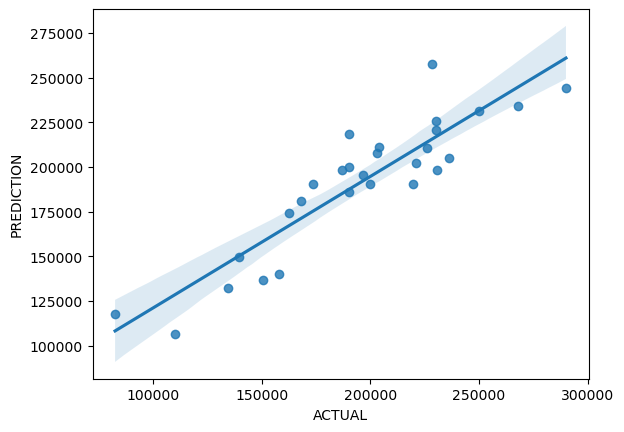

In [138]:
sns.regplot(data=OUTPUT_1,x='ACTUAL',y='PREDICTION')
plt.show()

In [141]:
OUTPUT_1['ERROR']=OUTPUT_1.ACTUAL-OUTPUT.PREDICTION

In [142]:
OUTPUT_1

,ACTUAL,PREDICTION,ERROR
0,139500.0,149468.724438,-16846.252627
1,250000.0,231141.636362,22339.179690
2,230500.0,198480.591879,18015.468839
3,168000.0,180916.252134,-7805.951720
4,110000.0,106430.346902,471.511259
5,173500.0,190558.900961,-20930.074827
6,150750.0,136580.069731,11554.834215
7,236000.0,205282.830361,32577.930684
8,162500.0,174233.578976,-7778.324004
9,221000.0,202051.986874,9480.350896


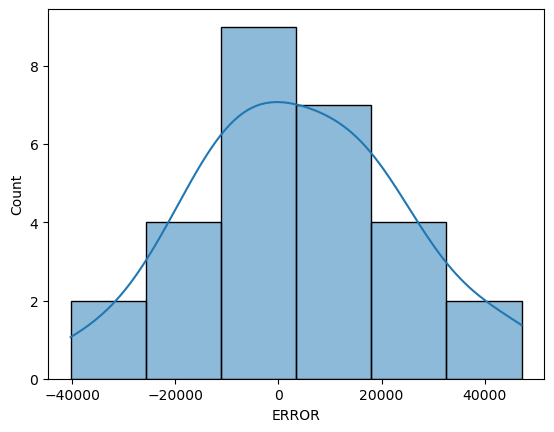

In [143]:
sns.histplot(data=OUTPUT_1,x="ERROR",kde=True)
plt.show()